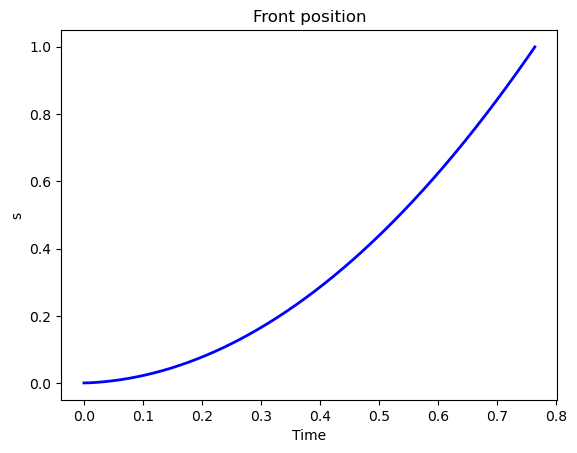

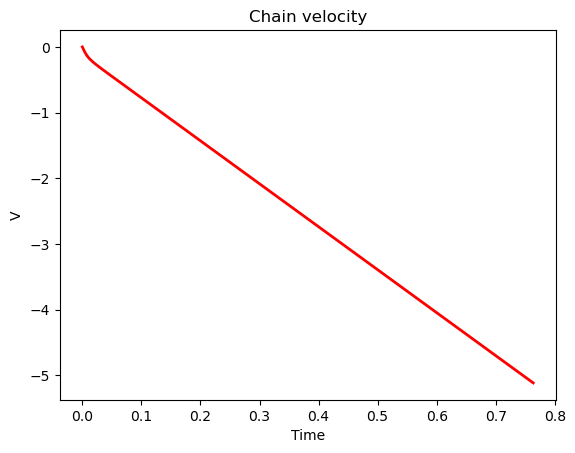

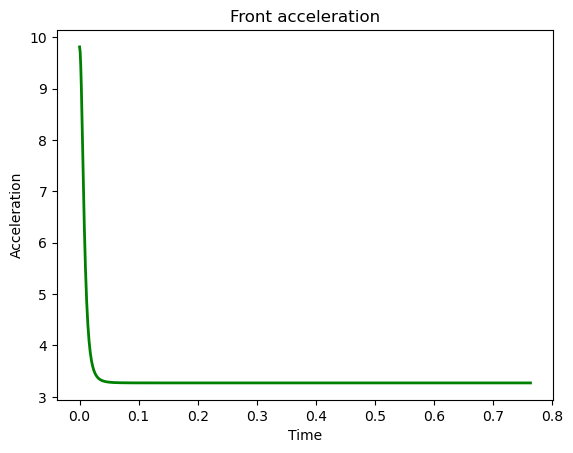

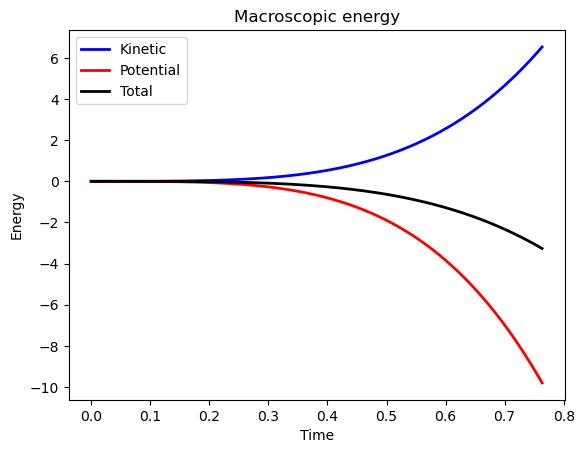

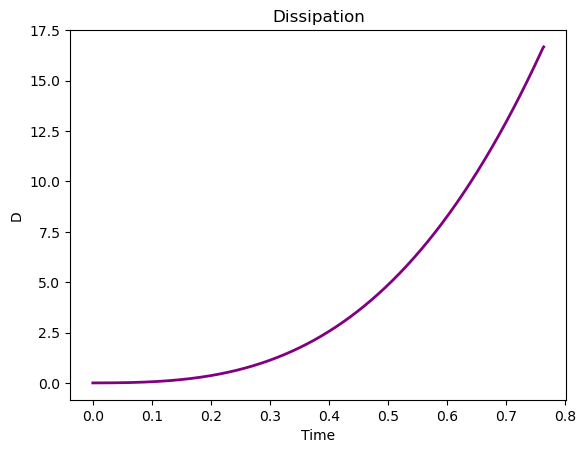

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ============================================================
# Parameters
# ============================================================
g = 9.81
rho = 1.0
L = 1.0

s0 = 1e-3
sd0 = 0.0

t_max = 2.0
t_eval = np.linspace(0, t_max, 2000)

# ============================================================
# ODE : s'' = g - (s'^2)/s
# ============================================================
def ode(t, y):
    s, sd = y
    s_safe = max(s, 1e-12)
    sdd = g - (sd**2) / s_safe
    return [sd, sdd]

def hit_L(t, y):
    return y[0] - L

hit_L.terminal = True
hit_L.direction = 1

sol = solve_ivp(
    ode, [0, t_max], [s0, sd0],
    t_eval=t_eval, events=hit_L,
    rtol=1e-9, atol=1e-12
)

t = sol.t
s = sol.y[0]
sd = sol.y[1]

# ============================================================
# Kinematics
# ============================================================
V = -2 * sd
s_safe = np.maximum(s, 1e-12)
sdd = g - (sd**2) / s_safe

# ============================================================
# Energies
# ============================================================
v_branch = -sd
K = 0.5 * (2 * rho * s) * (v_branch**2)   # kinetic
U = - rho * g * s**2                      # potential
E = K + U                                 # total

# Dissipation
dE_dt = np.gradient(E, t)
D = -dE_dt
D[D < 0] = 0.0

# ============================================================
# Plots
# ============================================================

# Front position
plt.figure()
plt.plot(t, s, color='blue', linewidth=2)
plt.xlabel("Time")
plt.ylabel("s")
plt.title("Front position")
plt.show()

# Chain velocity
plt.figure()
plt.plot(t, V, color='red', linewidth=2)
plt.xlabel("Time")
plt.ylabel("V")
plt.title("Chain velocity")
plt.show()

# Front acceleration
plt.figure()
plt.plot(t, sdd, color='green', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.title("Front acceleration")
plt.show()

# Energy
plt.figure()
plt.plot(t, K, color='blue', linewidth=2, label="Kinetic")
plt.plot(t, U, color='red', linewidth=2, label="Potential")
plt.plot(t, E, color='black', linewidth=2, label="Total")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Macroscopic energy")
plt.legend()
plt.show()

# Dissipation
plt.figure()
plt.plot(t, D, color='purple', linewidth=2)
plt.xlabel("Time")
plt.ylabel("D")
plt.title("Dissipation")
plt.show()
